Fraud Detection Model Accuracy: 49.00%


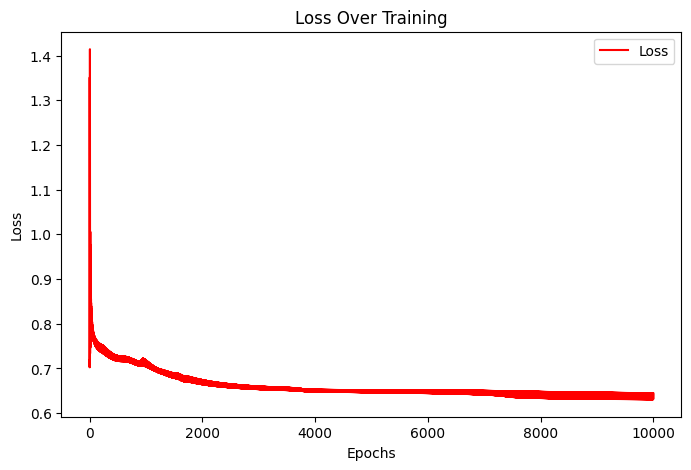

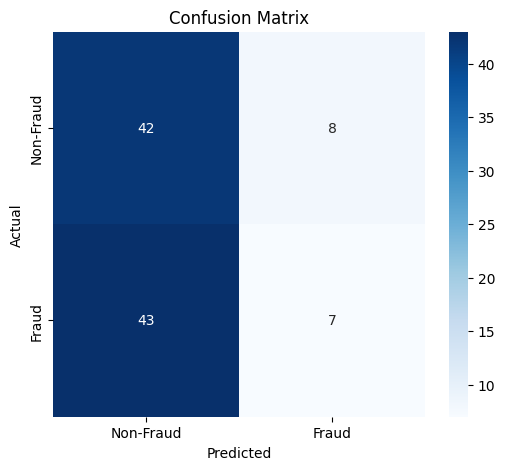

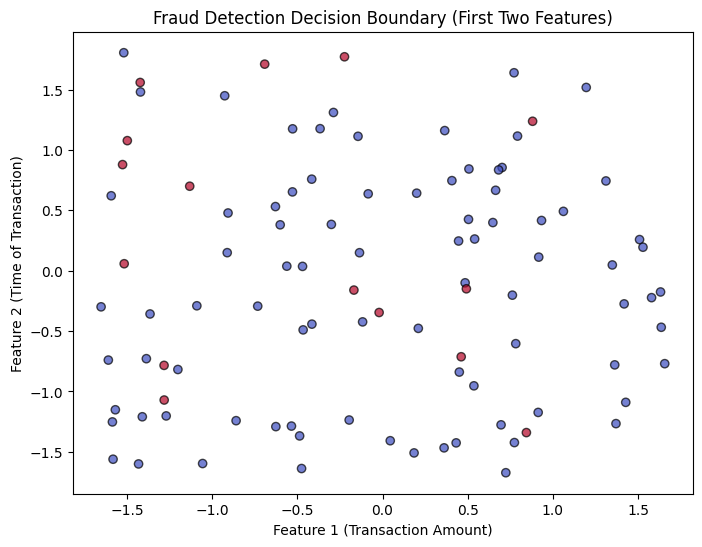

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
17
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
# -------------------------------
# 1. Generate Synthetic Fraud Dataset
# -------------------------------
np.random.seed(42)
num_samples = 500
# Features: Transaction Amount, Time of Transaction, Location Score, Frequency of

X = np.hstack([
np.random.uniform(10, 1000, (num_samples, 1)),   # Transaction Amount
np.random.uniform(0, 24, (num_samples, 1)),
# Transaction Time (0-24 hours)
np.random.uniform(0, 1, (num_samples, 1)),
np.random.uniform(1, 50, (num_samples, 1))
])
# Fraud labels: 1 (Fraud), 0 (Non-Fraud)
y = np.random.randint(0, 2, (num_samples, 1))
# Normalize Data
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Location Trust Score (0-1)
# Transaction Frequency
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert to NumPy Arrays
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)  # Ensure y_train is a column vector
# -------------------------------
# 2. Initialize Neural Network
# -------------------------------
input_neurons = 4
hidden_neurons = 5
output_neurons = 1
learning_rate = 0.1
epochs = 10000
# Initialize Weights and Biases
W1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons))
b1 = np.zeros((1, hidden_neurons))
W2 = np.random.uniform(-1, 1, (hidden_neurons, output_neurons))
18
b2 = np.zeros((1, output_neurons))

# -------------------------------
# 3. Activation Function & Derivative
# -------------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# -------------------------------
# 4. Train the MLP
# -------------------------------
loss_history = []
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X_train, W1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, W2) + b2
    final_output = sigmoid(final_input)

    # Compute Binary Cross-Entropy Loss
    loss = -np.mean(y_train * np.log(final_output) + (1 - y_train) * np.log(1 - final_output))
    loss_history.append(loss)

    # Backpropagation
    error = y_train - final_output
    d_output = error * sigmoid_derivative(final_output)
    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update Weights and Biases
    W2 += hidden_output.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X_train.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# -------------------------------
# 5. Test the Model
# -------------------------------
hidden_output = sigmoid(np.dot(X_test, W1) + b1)
final_output = sigmoid(np.dot(hidden_output, W2) + b2)
y_pred = (final_output > 0.5).astype(int)

# Compute Accuracy
19

accuracy = accuracy_score(y_test, y_pred)
print(f"Fraud Detection Model Accuracy: {accuracy * 100:.2f}%")
# -------------------------------
# 6. Visualizations
# -------------------------------
# Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label='Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Training")
plt.legend()
plt.show()
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud',
'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# Decision Boundary (Using First Two Features)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred.ravel(), cmap="coolwarm", edgecolors="k",
alpha=0.7)
plt.xlabel("Feature 1 (Transaction Amount)")
plt.ylabel("Feature 2 (Time of Transaction)")
plt.title("Fraud Detection Decision Boundary (First Two Features)")
plt.show()
